In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import STIX_interactiveQL as istx
#import STIX_QL as stxql
#import RPW_interactiveQL as irpw
import RPW_STIX_pylab as sololab
import datetime as dt
from astropy.time.core import Time

 # folder paths
RPW_folder= "../RPW/CDF/"
STIX_folder="../STIX/stx_files/"


#RPW indexes
# suggested  indexes : Antonio vecchio
#IDX_SELECTED_FREQS=[437,441,442,448,453,458,465,470,477,482,493,499,511,519,526,533,538,545,552,559,566,576,588,592,600,612,656,678,696,716,734,741,750,755,505,629,649,673,703,727]
# poluted ,505,629,649,673,703,727695700
#idx_0=436
#selected_indexes = np.array(IDX_SELECTED_FREQS)-idx_0



Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1267494928_20201117T174821-20201117T184405_030115_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201117_V09.cdf
  Type: RPW L2
  sensors:  (0,) (339736,)
  data cropped from  2020-11-17 17:48:30  to  2020-11-17 18:44:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675 3225 3525 4125 4525 5225 5825 6525 15625 16325 3825 10025 11025 12225 13725 14925
  Creating mean bkg from  17-Nov-2020 17:50:30  to  17-Nov-2020 18:10:30 ...
  bkg done.
Time axis constrained to common time interval...
Time interval from 17-Nov-2020 17:48:32  to  17-Nov-2020 18:43:24


/home/localuser/Documents/M2_AstroParis2021/InternshipLESIA/devrad/STIX_RPW_plot/RPW_STIX_pylab.py:354: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  cm= plt.pcolormesh(t,f,z,shading="auto",cmap=cmap)


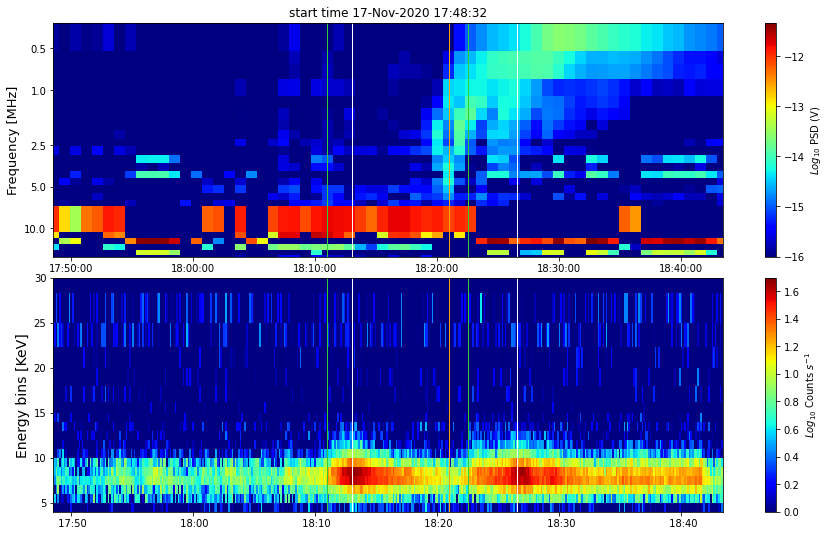

In [2]:
# 17NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20201117/solo_L1A_stix-sci-xray-l1-1267494928_20201117T174821-20201117T184405_030115_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201117_V09.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "17-Nov-2020 17:48:30"
end_time = "17-Nov-2020 18:44:00"

bkg_start = "17-Nov-2020 17:50:30"
bkg_end="17-Nov-2020 18:10:30"

# select time range datetime
date_range=[start_time,end_time]
bkg_range=[bkg_start,bkg_end]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,#proposed_indexes=selected_indexes
                         freq_range=[0,17000],rpw_bkg_interval=bkg_range)
# markers of interest
markerlines = {"17-Nov-2020 18:11:00":"limegreen",
               "17-Nov-2020 18:13:00":"white",
               "17-Nov-2020 18:21:00":"orange",
               
               "17-Nov-2020 18:22:30":"limegreen",
               "17-Nov-2020 18:26:30":"white",
               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,30],
                               markers=markerlines,markerwidth=1)

# EVENTS 17 Nov 2020
## Event 15:26

In [9]:
# 19NOV2020 0600
# STIX files
stx_L1file = "../STIX/stx_files/20201117/solo_L1A_stix-sci-xray-l1-1267455248_20201117T152120-20201117T160050_030091_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201117_V09.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "17-Nov-2020 15:21:30"
end_time = "17-Nov-2020 15:50:00"

start_bk = "17-Nov-2020 15:21:30"
end_bk = "17-Nov-2020 15:24:00"



# select time range datetime
date_range=[start_time,end_time]
bkg_range=[start_bk,end_bk]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,rpw_bkg_interval=bkg_range,
                         #proposed_indexes=selected_indexes,
                                 which_freqs="nonzero",freq_range=[0,17000])
# markers of interest
markerlines = {"17-Nov-2020 15:24:30":"limegreen",
               "17-Nov-2020 15:26:00":"white",
               "17-Nov-2020 15:28:00":"orange",
               
               "17-Nov-2020 15:31:00":"limegreen",
               "17-Nov-2020 15:32:30":"white",
               
               "17-Nov-2020 15:39:40":"limegreen",
               "17-Nov-2020 15:40:10":"white",
               
               "17-Nov-2020 15:40:40":"limegreen",
               "17-Nov-2020 15:41:20":"white",
               
               "17-Nov-2020 15:43:00":"limegreen",
               "17-Nov-2020 15:44:30":"white",
               }

# markers of interest
solar_events = []
solar_events.append(sololab.solar_event("stix_flare",times={"start":"17-Nov-2020 15:31:00","peak":"17-Nov-2020 15:32:30"}))
solar_events.append(sololab.solar_event("stix_flare",times={"start":"17-Nov-2020 15:39:40","peak":"17-Nov-2020 15:40:10"},color="magenta"))
solar_events.append(sololab.solar_event("stix_flare",times={"start":"17-Nov-2020 15:40:40","peak":"17-Nov-2020 15:41:20"},color="limegreen"))
solar_events.append(sololab.solar_event("stix_flare",times={"start":"17-Nov-2020 15:24:30","peak":"17-Nov-2020 15:26:00"},color="yellow"))
solar_events.append(sololab.solar_event("stix_flare",times={"start":"17-Nov-2020 15:43:00","peak":"17-Nov-2020 15:44:30"},color="red"))

solar_events.append(sololab.solar_event("rpw_burst",times={"peak":"17-Nov-2020 15:28:00"},paint_in="both"))





Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1267455248_20201117T152120-20201117T160050_030091_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201117_V09.cdf
  Type: RPW L2
  sensors:  (0,) (339736,)
  data cropped from  2020-11-17 15:21:30  to  2020-11-17 15:50:00
  Selected frequencies [kHz]:  375 425 475 525 575 625 675 725 775 825 875 925 975 1025 1075 1125 1175 1225 1275 1325 1375 1425 1475 1525 1575 1625 1675 1725 1775 1825 1875 1925 1975 2025 2075 2125 2175 2225 2275 2325 2375 2425 2475 2525 2575 2625 2675 2725 2775 2825 2875 2925 2975 3025 3075 3125 3175 3225 3275 3325 3375 3425 3475 3525 3625 3725 3825 3925 4025 4125 4225 4325 4425 4525 4625 4725 4825 4925 5025 5125 5225 5325 5425 5525 5625 5725 5825 5925 6025 6125 6225 6325 6425 6525 6625 672

Time axis constrained to common time interval...
Time interval from 17-Nov-2020 15:21:56  to  17-Nov-2020 15:49:50


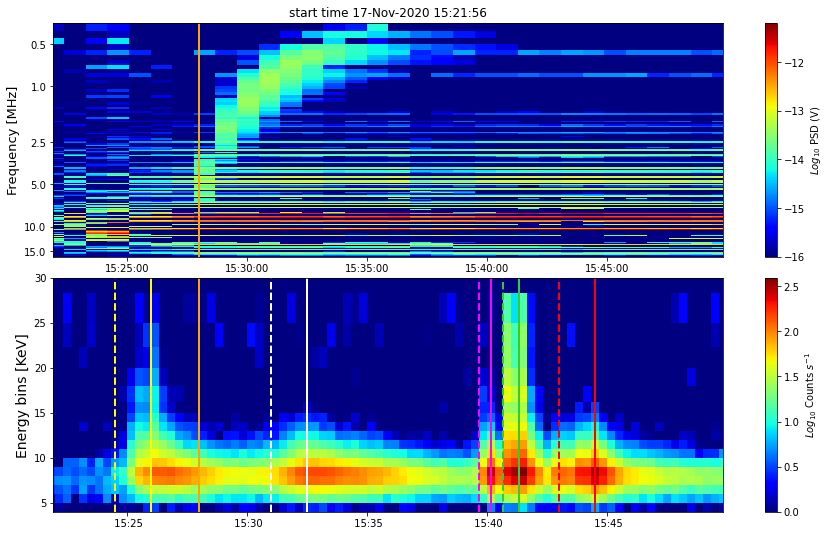

In [10]:
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,30],events=solar_events)
                               #markers=markerlines,markerwidth=1)

<AxesSubplot:ylabel='Energy bins [KeV]'>

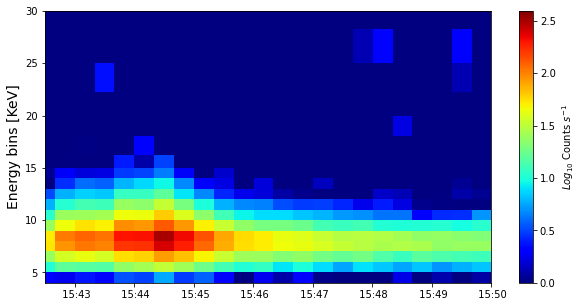

In [11]:
#19NOV2020 0600
start_time = "17-Nov-2020 15:42:30"
end_time = "17-Nov-2020 15:50:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

plt.figure(figsize=(10,5))
sololab.stix_plot_spectrogram(l1_cts,date_range=date_range,energy_range=[4,30])

## Event 18:26

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1267494928_20201117T174821-20201117T184405_030115_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201117_V09.cdf
  Type: RPW L2
  sensors:  (0,) (339736,)
  data cropped from  2020-11-17 17:48:30  to  2020-11-17 18:44:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675 3225 3525 4125 4525 5225 5825 6525
  Creating mean bkg from  17-Nov-2020 17:50:30  to  17-Nov-2020 18:10:30 ...
  bkg done.
Time axis constrained to common time interval...
Time interval from 17-Nov-2020 17:48:32  to  17-Nov-2020 18:43:24


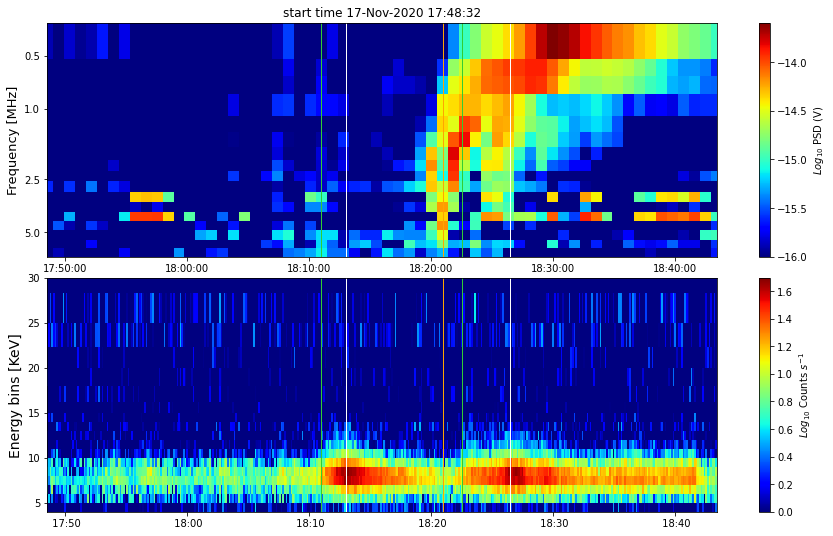

In [31]:
# 17NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20201117/solo_L1A_stix-sci-xray-l1-1267494928_20201117T174821-20201117T184405_030115_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201117_V09.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "17-Nov-2020 17:48:30"
end_time = "17-Nov-2020 18:44:00"

bkg_start = "17-Nov-2020 17:50:30"
bkg_end="17-Nov-2020 18:10:30"

# select time range datetime
date_range=[start_time,end_time]
bkg_range=[bkg_start,bkg_end]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,16000],rpw_bkg_interval=bkg_range)
# markers of interest
markerlines = {"17-Nov-2020 18:11:00":"limegreen",
               "17-Nov-2020 18:13:00":"white",
               "17-Nov-2020 18:21:00":"orange",
               
               "17-Nov-2020 18:22:30":"limegreen",
               "17-Nov-2020 18:26:30":"white",
               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,30],
                               markers=markerlines,markerwidth=1)

# EVENTS 18 Nov 2020
## Event 10:01

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1267889168_20201118T095201-20201118T110710_030105_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf
  Type: RPW L2
  sensors:  (0,) (339160,)
  data cropped from  2020-11-18 09:53:00  to  2020-11-18 10:39:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0 3225.0 3525.0 4125.0 4525.0 5225.0 5825.0 6525.0
Time axis constrained to common time interval...
Time interval from 18-Nov-2020 09:53:35  to  18-Nov-2020 10:38:34


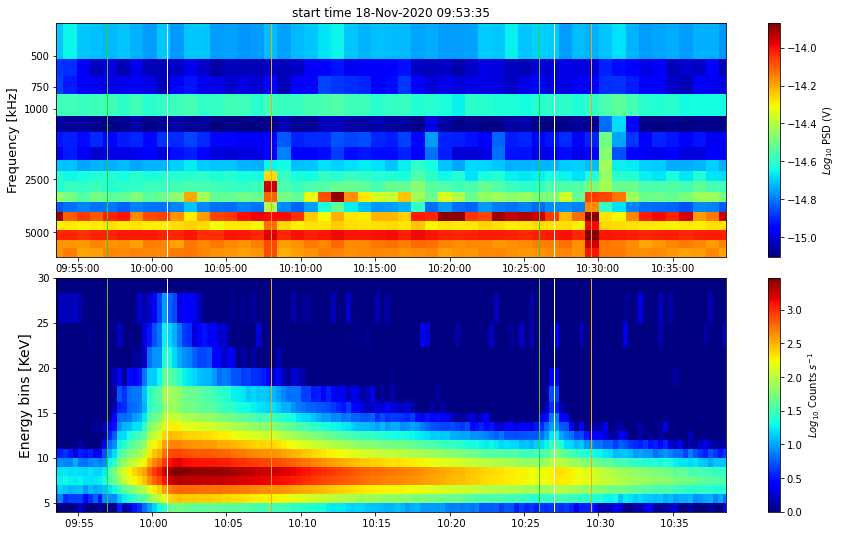

In [5]:
# 17NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20201118/solo_L1A_stix-sci-xray-l1-1267889168_20201118T095201-20201118T110710_030105_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "18-Nov-2020 09:53:00"
end_time = "18-Nov-2020 10:39:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,10000])
# markers of interest
markerlines = {"18-Nov-2020 09:57:00":"limegreen",
               "18-Nov-2020 10:01:00":"white",
               "18-Nov-2020 10:08:00":"orange",
               
               "18-Nov-2020 10:26:00":"limegreen",
               "18-Nov-2020 10:27:00":"white",
               "18-Nov-2020 10:29:30":"orange",
               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,30],
                               markers=markerlines,markerwidth=1)

## Event 13:38

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1267936272_20201118T124401-20201118T135621_030106_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf
  Type: RPW L2
  sensors:  (0,) (339160,)
  data cropped from  2020-11-18 12:44:00  to  2020-11-18 13:56:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675
  Creating mean bkg from  18-Nov-2020 12:50:00  to  18-Nov-2020 13:00:00 ...
  bkg done.
Time axis constrained to common time interval...
Time interval from 18-Nov-2020 12:44:28  to  18-Nov-2020 13:55:31


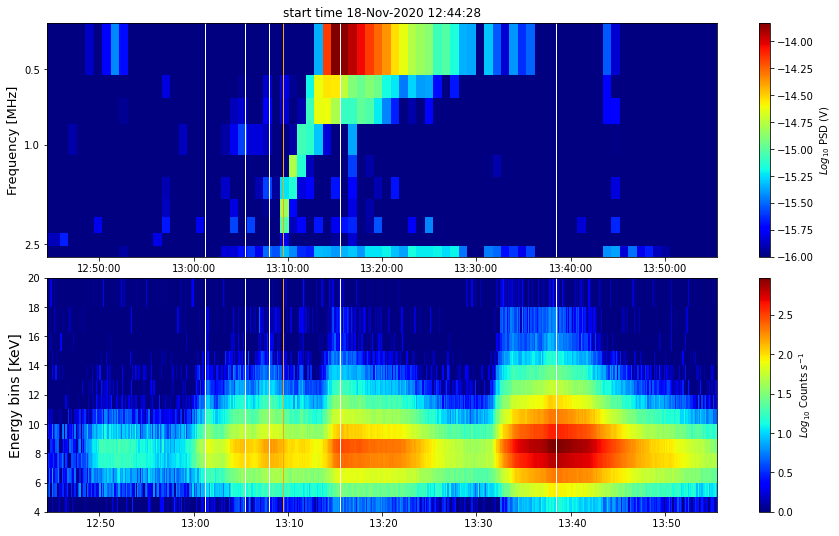

In [3]:
#STIX files
stx_L1file = "../STIX/stx_files/20201118/solo_L1A_stix-sci-xray-l1-1267936272_20201118T124401-20201118T135621_030106_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "18-Nov-2020 12:44:00"
end_time = "18-Nov-2020 13:56:00"


start_bkg = "18-Nov-2020 12:50:00"
end_bkg = "18-Nov-2020 13:00:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]


bkg_range=[start_bkg,end_bkg]
bkg_interval = [dt.datetime.strptime(x,dt_fmt) for x in bkg_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,rpw_bkg_interval=bkg_range,
                         proposed_indexes=selected_indexes,freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "18-Nov-2020 13:09:30":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "18-Nov-2020 13:01:10":"white",
               "18-Nov-2020 13:05:30":"white",
               "18-Nov-2020 13:08:00":"white",
               "18-Nov-2020 13:15:30":"white",
               "18-Nov-2020 13:38:30":"white",
               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,20],
                               markers=markerlines,markerwidth=1)

## Event 16:50

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268000272_20201118T163821-20201118T171239_030119_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf
  Type: RPW L2
  sensors:  (0,) (339160,)
  data cropped from  2020-11-18 16:43:00  to  2020-11-18 17:12:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0
Time axis constrained to common time interval...
Time interval from 18-Nov-2020 16:43:42  to  18-Nov-2020 17:11:35


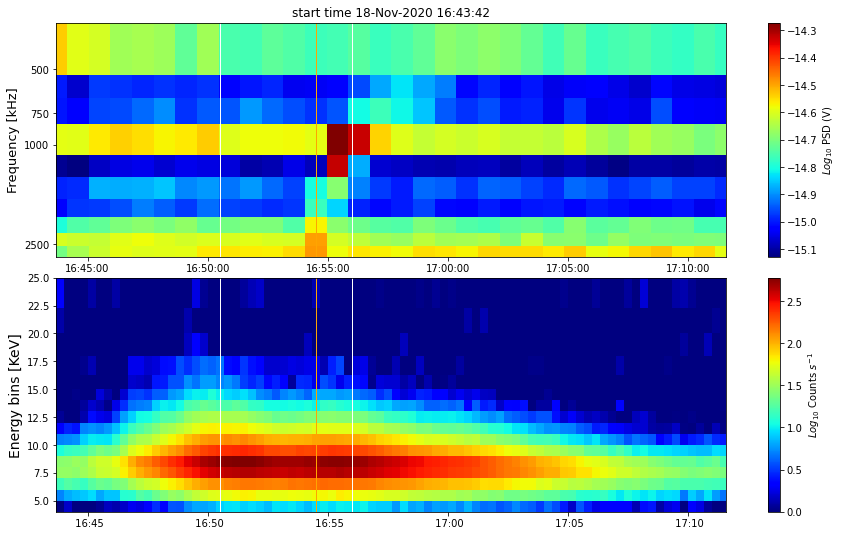

In [7]:
# 18NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20201118/solo_L1A_stix-sci-xray-l1-1268000272_20201118T163821-20201118T171239_030119_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKGstart_time = "17-Nov-2020 15:21:30"
end_time = "17-Nov-2020 15:50:00"
/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "18-Nov-2020 16:43:00"
end_time = "18-Nov-2020 17:12:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "18-Nov-2020 16:54:30":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "18-Nov-2020 16:50:30":"white",
               "18-Nov-2020 16:56:00":"white",

               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,25],
                               markers=markerlines,markerwidth=1)

## Event 18:02

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268017680_20201118T174241-20201118T184720_030120_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf
  Type: RPW L2
  sensors:  (0,) (339160,)
  data cropped from  2020-11-18 17:19:00  to  2020-11-18 19:10:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0
Time axis constrained to common time interval...
Time interval from 18-Nov-2020 17:42:44  to  18-Nov-2020 18:47:16


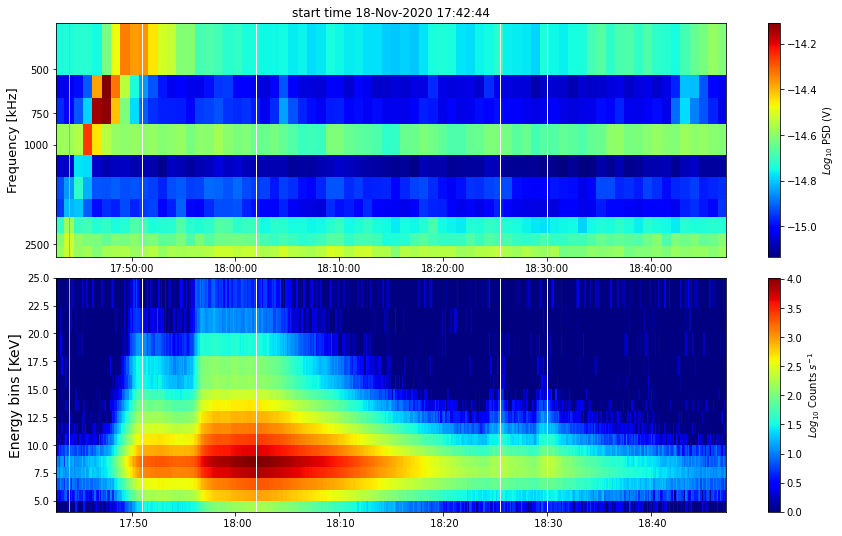

In [8]:
# 18NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20201118/solo_L1A_stix-sci-xray-l1-1268017680_20201118T174241-20201118T184720_030120_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "18-Nov-2020 17:19:00"
end_time = "18-Nov-2020 19:10:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "18-Nov-2020 17:44:00":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "18-Nov-2020 17:51:00":"white",
               "18-Nov-2020 18:02:00":"white",
               "18-Nov-2020 18:25:30":"white",
               "18-Nov-2020 18:30:00":"white",
               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,25],
                               markers=markerlines,markerwidth=1)

# Event 22:30

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268092688_20201118T221540-20201118T225850_030122_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf
  Type: RPW L2
  sensors:  (0,) (339160,)
  data cropped from  2020-11-18 22:11:00  to  2020-11-18 22:58:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0
Time axis constrained to common time interval...
Time interval from 18-Nov-2020 22:15:50  to  18-Nov-2020 22:57:46


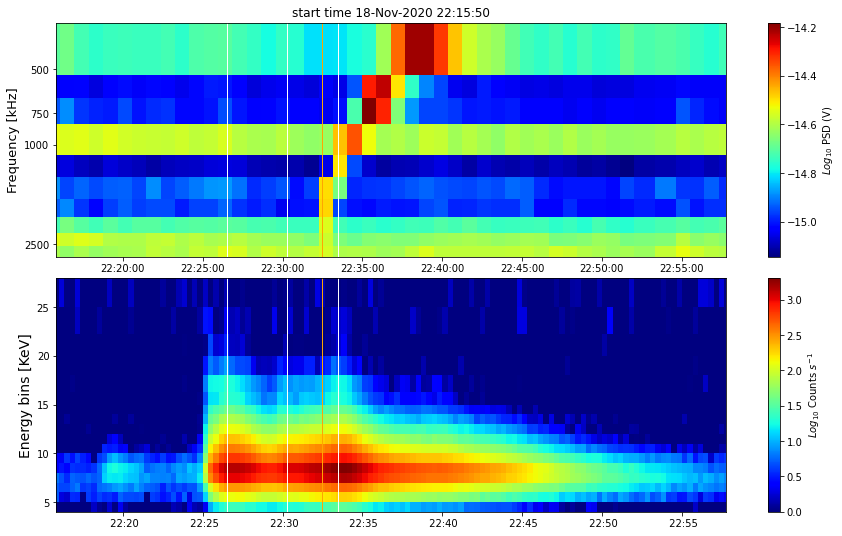

In [10]:
# 18NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20201118/solo_L1A_stix-sci-xray-l1-1268092688_20201118T221540-20201118T225850_030122_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "18-Nov-2020 22:11:00"
end_time = "18-Nov-2020 22:58:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "18-Nov-2020 22:32:30":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "18-Nov-2020 22:26:30":"white",
               "18-Nov-2020 22:33:30":"white",
               "18-Nov-2020 22:30:15":"white",
            }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,28],
                               markers=markerlines,markerwidth=1)

# EVENTS 19 Nov 2020
## Event 05:48

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268344848_20201119T054055-20201119T063555_030127_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201119_V08.cdf
  Type: RPW L2
  sensors:  (0,) (342080,)
  data cropped from  2020-11-19 05:44:00  to  2020-11-19 06:30:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675
  Creating mean bkg from  19-Nov-2020 05:44:00  to  19-Nov-2020 05:46:00 ...
  bkg done.
Time axis constrained to common time interval...
Time interval from 19-Nov-2020 05:44:21  to  19-Nov-2020 06:29:20


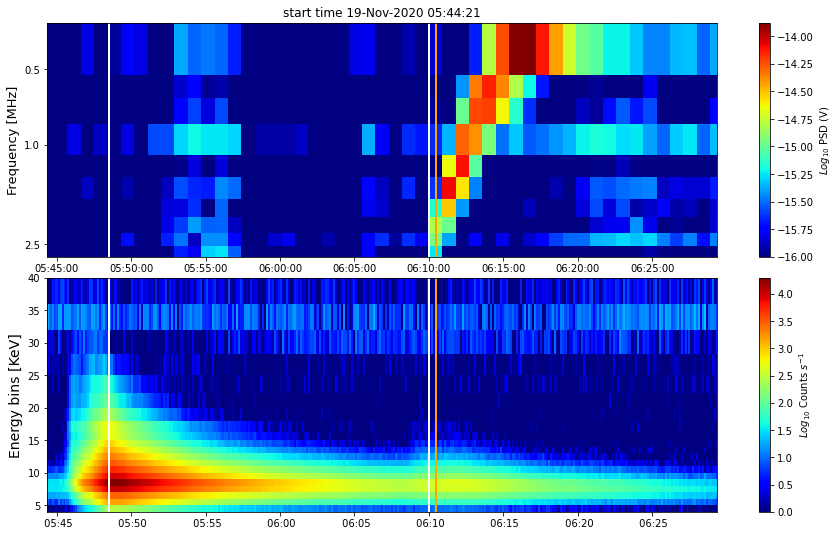

In [11]:
# 19NOV2020 0600
# STIX files
stx_L1file = "../STIX/stx_files/20201119/solo_L1A_stix-sci-xray-l1-1268344848_20201119T054055-20201119T063555_030127_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201119_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "19-Nov-2020 05:44:00"
end_time = "19-Nov-2020 06:30:00"

start_bkg = "19-Nov-2020 05:44:00"
end_bkg = "19-Nov-2020 05:46:00"


# select time range datetime
date_range=[start_time,end_time]
date_bkg=[start_bkg,end_bkg]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,rpw_bkg_interval=date_bkg,
                         proposed_indexes=selected_indexes,freq_range=[0,3000])
# markers of interest
markerlines = {#"19-Nov-2020 05:46:00":"limegreen",
               "19-Nov-2020 05:48:30":"white",
               
               #"19-Nov-2020 06:09:00":"limegreen",
               "19-Nov-2020 06:10:00":"white",
              "19-Nov-2020 06:10:30":"orange",}
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,40],
                               markers=markerlines,markerwidth=2)


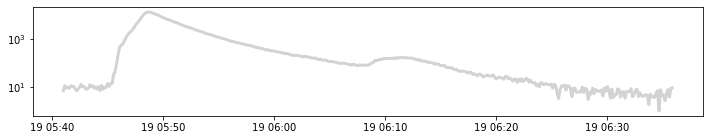

In [20]:
plt.figure(figsize=(12,2))
plot_counts_per_energy(l1_cts,e_range=[1,40],legend=False,lcolor="lightgrey",lw=3,#date_range=date_range,
                       integrate_bins=[[10,16]])#,[16,28],[50,80]

## event 15:56

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268508944_20201119T154059-20201119T163239_030144_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201119_V08.cdf
  Type: RPW L2
  sensors:  (0,) (342080,)
  data cropped from  2020-11-19 13:40:00  to  2020-11-19 16:38:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675
  Creating mean bkg from  19-Nov-2020 16:20:00  to  19-Nov-2020 16:30:00 ...
  bkg done.
Time axis constrained to common time interval...
Time interval from 19-Nov-2020 15:41:14  to  19-Nov-2020 16:32:34


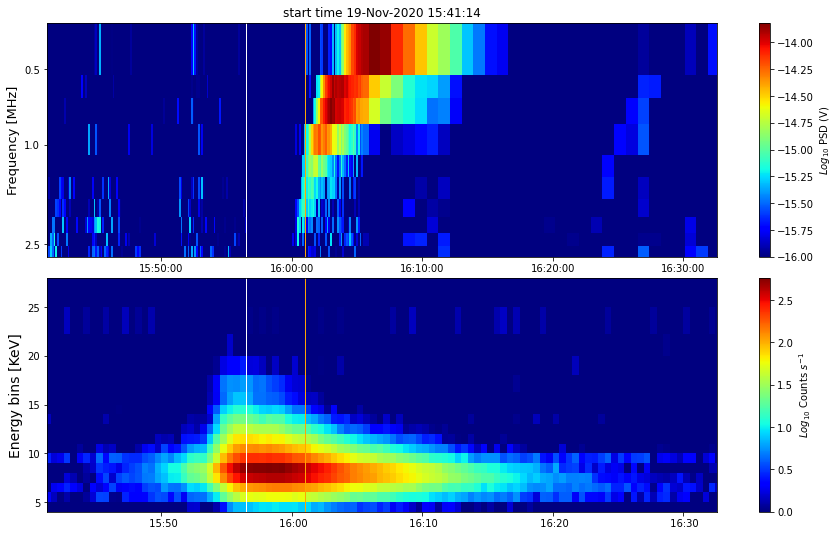

In [9]:
# 19NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20201119/solo_L1A_stix-sci-xray-l1-1268508944_20201119T154059-20201119T163239_030144_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201119_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "19-Nov-2020 13:40:00"
end_time = "19-Nov-2020 16:38:00"


start_bkg = "19-Nov-2020 16:20:00"
end_bkg = "19-Nov-2020 16:30:00"
# select time range datetime
date_range=[start_time,end_time]
bkg_range=[start_bkg,end_bkg]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,rpw_bkg_interval=bkg_range,
                         proposed_indexes=selected_indexes,freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "19-Nov-2020 16:01:00":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "19-Nov-2020 15:56:30":"white",

            }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,28],
                               markers=markerlines,markerwidth=1)

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1269458192_20201121T093700-20201121T094810_030161_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201121_V09.cdf
  Type: RPW L2
  sensors:  (0,) (340888,)
  data cropped from  2020-11-21 09:20:00  to  2020-11-21 09:50:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0 3225.0 3525.0 4125.0 4525.0 5225.0 5825.0 6525.0
Time axis constrained to common time interval...
Time interval from 21-Nov-2020 09:37:09  to  21-Nov-2020 09:48:05


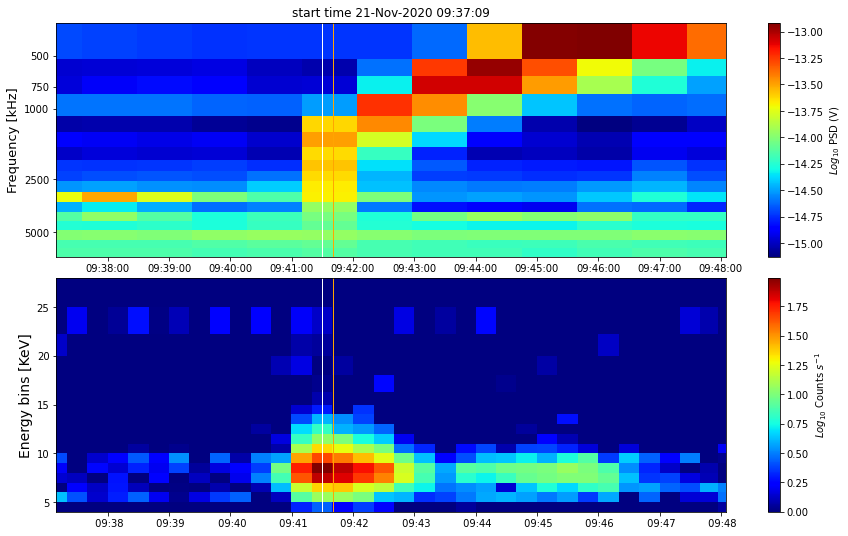

In [13]:
# 20NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20201121/solo_L1A_stix-sci-xray-l1-1269458192_20201121T093700-20201121T094810_030161_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201121_V09.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "21-Nov-2020 09:20:00"
end_time = "21-Nov-2020 09:50:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,10000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "21-Nov-2020 09:41:40":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "21-Nov-2020 09:41:30":"white",

            }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,28],
                               markers=markerlines,markerwidth=1)

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1269578256_20201121T165800-20201121T172339_030166_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201121_V09.cdf
  Type: RPW L2
  sensors:  (0,) (340888,)
  data cropped from  2020-11-21 16:58:00  to  2020-11-21 17:34:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0
Time axis constrained to common time interval...
Time interval from 21-Nov-2020 16:58:49  to  21-Nov-2020 17:23:19


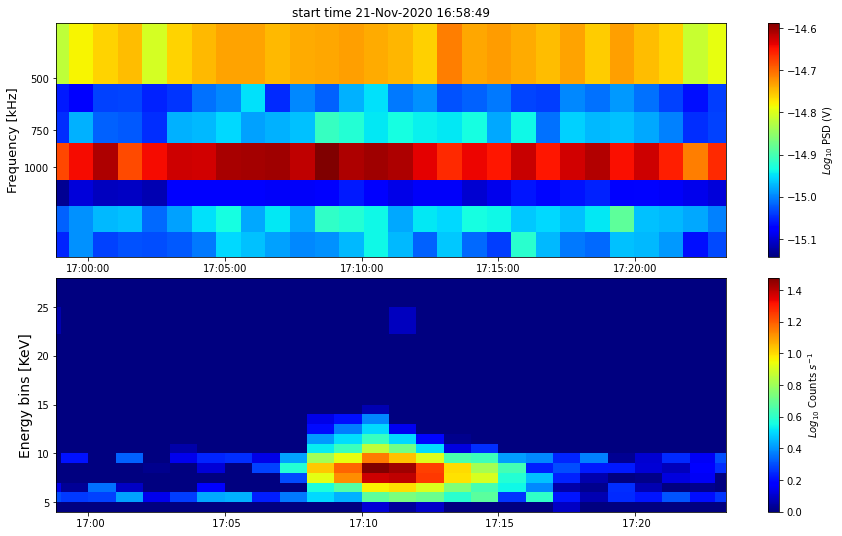

In [14]:
# 20NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20201121/solo_L1A_stix-sci-xray-l1-1269578256_20201121T165800-20201121T172339_030166_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201121_V09.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "21-Nov-2020 16:58:00"
end_time = "21-Nov-2020 17:34:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,2000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "21-Nov-2020 09:41:40":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "21-Nov-2020 09:41:30":"white",

            }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,28],
                               markers=markerlines,markerwidth=1)

Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201121_V09.cdf
  Type: RPW L2
  sensors:  (0,) (340888,)
  data cropped from  2020-11-21 15:20:00  to  2020-11-21 16:50:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0


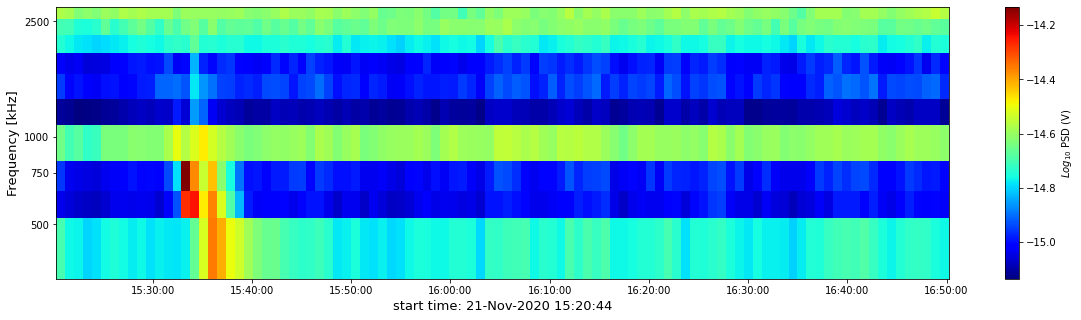

In [15]:

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "21-Nov-2020 15:20:00"
end_time = "21-Nov-2020 16:50:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

#l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file,sensor=9),date_range=date_range,proposed_indexes=selected_indexes,freq_range=[0,3000])
plt.figure(figsize=(20,5))
sololab.rpw_plot_psd(rpw_psd)

# JULY 2021

In [3]:
# 20NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20210717/solo_L1A_stix-sci-xray-l1-2107170037_20210717T043515-20210717T053459_031085_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202107_BKG/solo_L1A_stix-sci-xray-l1-2107100004_20210710T230008-20210711T003708_031071_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202107/solo_L2_rpw-hfr-surv_20210717_V01.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "17-Jul-2021 04:34:00"
end_time = "17-Jul-2021 05:34:00"

##
start_bkg = "17-Jul-2021 04:34:00"
end_bkg = "17-Jul-2021 04:48:00"


# select time range datetime
date_range=[start_time,end_time]
bkg_range=[start_bkg,end_bkg]

time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,16000],rpw_bkg_interval=bkg_range)


Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2107170037_20210717T043515-20210717T053459_031085_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2107100004_20210710T230008-20210711T003708_031071_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv_20210717_V01.cdf
  Type: RPW L2
  sensors:  (847761,) (0,)


NameError: name 'selected_indexes' is not defined

In [ ]:
# markers of interest
solar_events = []
solar_events.append(sololab.solar_event("interval",times={"start":"17-Jul-2021 05:03:00","end":"17-Jul-2021 05:04:15"},paint_in="stix",linewidth=1,hl_alpha=0.4))
solar_events.append(sololab.solar_event("interval",times={"start":"17-Jul-2021 05:05:30","end":"17-Jul-2021 05:06:36"},paint_in="stix",linewidth=1,hl_alpha=0.4))
solar_events.append(sololab.solar_event("interval",times={"start":"17-Jul-2021 05:09:30","end":"17-Jul-2021 05:10:36"},paint_in="stix",linewidth=1,hl_alpha=0.4))
solar_events.append(sololab.solar_event("interval",times={"start":"17-Jul-2021 05:14:30","end":"17-Jul-2021 05:16:15"},paint_in="stix",linewidth=1,hl_alpha=0.4))

#solar_events.append(sololab.solar_event("rpw_burst",times={"peak":"17-Jul-2021 04:52:00"},paint_in="both"))
#solar_events.append(sololab.solar_event("rpw_burst",times={"peak":"17-Jul-2021 05:13:05"},paint_in="both"))
#solar_events.append(sololab.solar_event("rpw_burst",times={"peak":"17-Jul-2021 05:11:00"},paint_in="both"))
#solar_events.append(sololab.solar_event("rpw_burst",times={"peak":"17-Jul-2021 05:15:35"},paint_in="both"))
#solar_events.append(sololab.solar_event("rpw_burst",times={"peak":"17-Jul-2021 05:17:50"},paint_in="both"))




markerlines = {#"17-Jul-2021 05:11:00":"limegreen",
                #"17-Jul-2021 04:55:00":"white",
               #"17-Jul-2021 04:59:00":"white",
                
                "17-Jul-2021 05:02:00":"limegreen",
               "17-Jul-2021 05:05:00":"limegreen",
    
                "17-Jul-2021 05:05:30":"white",
               "17-Jul-2021 05:06:30":"white",
    
                "17-Jul-2021 05:13:30":"magenta",
               "17-Jul-2021 05:15:00":"magenta",
    
                "17-Jul-2021 04:51:30":"orange",
               "17-Jul-2021 05:13:00":"orange",
    
                

            }

#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,100],figsize=[16,8],
                               events=solar_events,rpw_cmap="nipy_spectral",stix_cmap="nipy_spectral")
                               #markers=markerlines,markerwidth=2)
plt.yscale('log')
#plt.grid(which="both")

In [3]:
solar_events[0].linewidth

2

In [15]:
import matplotlib.dates as mdates
from datetime import  datetime
def plot_counts_per_energy(counts_dict,savename=None,
                      dt_fmt="%d-%b-%Y %H:%M:%S",title=None,e_range=None,
                      date_range=None,legend=True,fill_nan=True,lcolor="orange",lw=1,ls="-",
                      integrate_bins=None,zlogscale=True,ylogscale=True):
    #get data   
    plot_time = counts_dict["time"]
    energies = counts_dict ["energy_bins"]
    mean_e = np.array(counts_dict["mean_energy"])
    cts_per_sec = counts_dict["counts_per_sec"]
    cts_data = cts_per_sec #np.log10(cts_per_sec, out=np.zeros_like(cts_per_sec), where=(cts_per_sec>0)) if zlogscale else cts_per_sec
    
    myFmt = mdates.DateFormatter(dt_fmt)
    
    if(fill_nan):
        cts_data=np.nan_to_num(cts_data,nan=0)
    
    
    # select data
    if(e_range!=None):
        e_idx = np.logical_and(mean_e>=e_range[0],mean_e<=e_range[1])
        #print(e_idx)
 
        cts_data = cts_data[:,e_idx]
        energies = energies[e_idx]
        
        mean_e = mean_e[e_idx]
    if(date_range!=None):
        date_range=[datetime.strptime(x,dt_fmt) for x in date_range]
        d_idx = np.array([True if np.logical_and(x>=date_range[0],x<=date_range[1]) else False for x in plot_time])
        #print(d_idx)
        cts_data = cts_data[d_idx,:]
    
        #plot_time = plot_time[d_idx]
        plot_time = [i for (i, v) in zip(plot_time, d_idx) if v]
     
    
    
    
    plot_groups = []
    
    if(integrate_bins!=None):
        for e_bin in integrate_bins:

            e_idx = np.logical_and(mean_e>=e_bin[0],mean_e<=e_bin[1])
            
            cts_per_sec_g = cts_data[:,e_idx]
            energies_g = energies[e_idx]
            mean_e_g= mean_e[e_idx]
            
            energy_g = [energies_g[0]["e_low"],energies_g[-1]["e_high"]]
            m_energy_g = np.mean([energies_g[0]["e_low"],energies_g[0]["e_high"]])
            cts_sec_g = np.sum(cts_per_sec_g,axis=1)
            
            
            plot_groups.append([cts_sec_g,energy_g,m_energy_g])
    else:
        for e in range(len(energies)):
            plot_groups.append([cts_per_sec[:,e],[energies[e]["e_low"],energies[e]["e_high"]],mean_e[e]])
        


    
    ax = plt.gca()
    #ax.xaxis.set_major_formatter(myFmt)
    
    for pg in plot_groups:
        ax.plot(plot_time,pg[0]+1,label="{} - {} keV".format(int(pg[1][0]),int(pg[1][1])),c=lcolor,lw=lw,ls=ls)
    if(legend):
        plt.legend()
    if(ylogscale):
        #plt.ylim(0.5,np.max(cts_per_sec))
        plt.yscale("log")
    
    


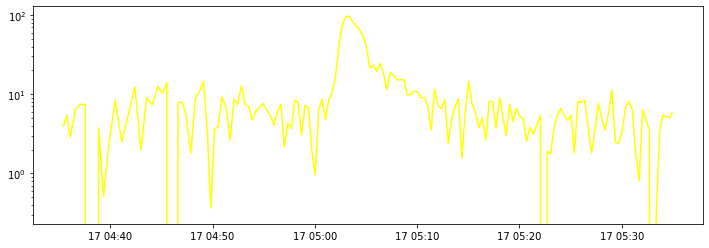

In [140]:
start_time = "17-Jul-2021 04:50:00"
end_time = "17-Jul-2021 05:25:00"

date_range=[start_time,end_time]
plt.figure(figsize=(12,4))
plot_counts_per_energy(l1_cts,e_range=[1,92],legend=False,#date_range=date_range,
                       integrate_bins=[[50,80]])#,[16,28],[50,80]

In [ ]:
    
    
    
    #cm= plt.pcolormesh(plot_time,mean_e,cts_data,shading="auto",cmap=cmap,vmin=0)
    if(colorbar):
        cblabel = "$Log_{10}$ Counts $s^{-1}$" if logscale else "Counts $s^{-1}$"
        plt.colorbar(cm,label=cblabel)
    if(x_axis):
        plt.xlabel("start time "+date_ranges[0],fontsize=14)
    plt.ylabel('Energy bins [KeV]',fontsize=14)
    if(energy_range):
        plt.ylim(*energy_range)
    if(title):
        plt.title(title)
    if(date_range):
        dt_fmt_ = "%d-%b-%Y %H:%M:%S"
        date_range=[datetime.strptime(x,dt_fmt_) for x in date_range]
        plt.xlim(*date_range)
    #return fig, axes
    if(savename):
        plt.savefig(savename,bbox_inch="tight")
    
    return ax
    
   # energies = counts_dict["energy_bins"]
    #plot_time = counts_dict["time"].plot_date
    #cts_per_sec = counts_dict["counts_per_sec"]
    # date range to Time object -> plot_date 
    if not date_range==None:
        date_range = interval2plt(date_range)
    # date format
    myFmt = mdates.DateFormatter(fmt)
    
    if(date_range!=None):
        #max val for ylim
        maxval = 0
        # sum for energy bin counts integration
        cts_sum = []
        
        for i in range(len(energies)):
            # if energy in range 
            if e_range == None or (e_range != None and energies[i]["e_low"]>=e_range[0] and energies[i]["e_high"]<=e_range[1]):
                
                # if not integratin plot every bin
                if(not integrate_bins): 
                    ax.plot_date(plot_time, cts_per_sec[:,i],'-', label=f'{energies[i]["e_low"]}-{energies[i]["e_high"]} keV')
                    maxval = np.max(cts_per_sec[:,i]) if np.max(cts_per_sec[:,i])>maxval else maxval
                
                else:
                    # in integrating, sum counts to cts_sum array
                    cts_sum.append(cts_per_sec[:,i])
        # for integrate: sum over collected arrays and evaluate maxval
        if(integrate_bins):
            cts_sum_ = np.sum(np.array(cts_sum),axis=0)
            maxval = 2*np.max(cts_sum_)
            txtlbl = "Summed {} - {} keV".format(int(e_range[0]),int(e_range[1])) if e_range else "Summed {} - {} keV".format(int(energies[0]["e_low"]),int(energies[-1]["e_low"]))
            ax.plot_date(plot_time, cts_sum_,'-', label=txtlbl)
        plt.xticks(np.linspace(date_range[0], date_range[1], n_ticks))
        plt.xlim(date_range[0],date_range[1])
        #plt.ylim(1,2*maxval)

        if(savename):
            plt.savefig(savename,bbox_inch="tight")
    else:
        # maxval for ylim
        maxval = 0
        # plot energies  in range if provided
        for i in range(len(energies)):
            if e_range == None or (e_range != None and energies[i]["e_low"]>=e_range[0] and energies[i]["e_high"]<=e_range[1]):
                ax.plot_date(plot_time, cts_per_sec[:,i],'-', label=f'{energies[i]["e_low"]}-{energies[i]["e_high"]} keV')
                maxval = np.max(cts_per_sec[:,i]) if np.max(cts_per_sec[:,i])>maxval else maxval
        plt.xticks(np.linspace(min(plot_time), max(plot_time), n_ticks))
    # format date
    ax.xaxis.set_major_formatter(myFmt)
    #title
    if(title):
        plt.title(title)
    #labels
    plt.xlabel("Date",fontsize=14)
    plt.ylabel('Counts $s^{-1}$',fontsize=14)
        
    #plt.ylim(1,2*maxval)
    # apply logscale if requested
    if(logscale and maxval>1):
        plt.yscale('log')
    plt.grid()
    if(legend):
        plt.legend(loc='lower center',bbox_to_anchor=(-0.2, 0.02),ncol=2,fontsize=12)
    if(savename):
        plt.savefig(savename,bbox_inch="tight")
